This notebook is dedicated to showing how the isolation parameter affects predictions in social influence models (i.e. the more isolation, the stronger the anti-vaccine population will be in the future)

# Import packages

In [74]:
# import packages
# import sys
# sys.path.insert(0, 'C:/Users/DeenoZord/Documents/All_Files_Laptop/Coding/Pyton_Files/Functions_and_modules')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

import networkx as nx
import random

import winsound 

import pickle
import scipy.stats as stt
from wgm2018_pack import *

from IPython.display import clear_output

# Functions & relative classes

In this first part we introduce all the functions to be used later. Many of them are used to provide a general framework for all the simulations. In such a way that the differences between models would be because of the formal model differences and not because each model has been written in a different way. In these models we have the following types of rules and properties:
- network = the structure of the network for interaction (here a fully connected one)
- Selection rule = how agents select each other for the interaction
- update rule = how agents change opinion after interaction
- tick = starting a new process of interaction

### Special functions

##### For dictionaries

In [75]:
# Calculates the mean from the values of a dictionary
def dic_mean(dic):
    vals_ = [dic[key] for key in dic]
    vals_ = np.array(vals_)
    return np.mean(vals_)

In [76]:
def dic2array(dic):
    x = []
    y = []
    for key in dic:
        x.append(key)
        y.append(dic[key])
        
    return [x,y]

In [77]:
def array2dic(x,y):
    dic = dict()
    
    for i in range(0,len(x)):
        xi = x[i]
        yi = y[i]
        
        dic[xi] = yi
        
    return dic

##### Save and read

In [78]:
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

##### Other

In [79]:
def get_index_below_thr(dic, thr):
    
    dic2 = dict()
    
    for key in dic:
        el = dic[key]
        
        if el <= thr:
            dic2[key] = el
    return dic2

In [80]:
def beep():
    freq = 500
    dur = 200
    winsound.Beep(freq, dur)
    
    return

### Functions for labelling

In [81]:
# Initialize the names of the agents as a set of numbers
def ordered_numbers_(self=None, N=10):
    agents_list = [str(i) for i in range(0,N)]
    if not (self==None):
        self.labels = agents_list
    else:
        return agents_list

Class containing all

In [82]:
class generate_labels:
    ordered_numbers = ordered_numbers_
#     bb = number_naming

### Functions for the Network

In [83]:
def mk_lattice_(self=None, dim=10,labels=None,periodic=False):
    # if dim is a single number it will make a square lattice dim*dim
    if self!= None:
        labels = self.labels
        
    if type(dim) == type(1):
        dim = [dim, dim]
        
    G = nx.grid_graph(dim=dim,periodic=periodic)
    
    # Rename the nodes with the right names
    nodes = list(G.nodes)
    d = {el:labels[i] for i, el in enumerate(nodes)}
    G = nx.relabel_nodes(G,d)
    
    if self!= None:    
        self.network = G
    else:
        return G
    

class

In [84]:
class mk_network:
    mk_lattice = mk_lattice_

### Functions for Initializing opinions

In [85]:
# Initialize the agents with random opinions from min and max [uniform distribution]
def rand_opinions_(self=None, labels=None, min_=0, max_=1):
    if self!=None:
        labels = self.labels
#     else:
#         print("self not passed")
        
    N = len(labels)
    op_vec = (np.random.rand(N)*(max_-min_))+min_
    dic_op = {labels[i]:op_vec[i] for i in range(0,N)}
    
    if self!=None:
        self.opinions = dic_op
    else:
        return dic_op

In [86]:
# Initialize from a specific distribution
# x_distrib represents the value, while
# y_distrib represents their distribution
def op_from_distrib_(self=None, x_distrib=[], y_distrib=[], labels=None):
    if self!=None:
        labels = self.labels
        
    dic_op = {}
        
    N = len(labels)
    
    # renormalize y
    y_distrib = np.array(y_distrib)
    y_distrib = y_distrib/np.sum(y_distrib)
    
    index_distrib = list(range(0,len(x_distrib)))
    
    for i in range(0,N):
        found = False
        
        while not found:
            
            ii = random.choice(index_distrib)
            
            xi = x_distrib[ii]
            yi = y_distrib[ii]
            
            r = np.random.rand()
            
            if yi>r:
                found = True
                dic_op[labels[i]] = xi
    
    if self!=None:
        self.opinions = dic_op
    else:
        return dic_op

In [87]:
# Initialize from a specific distribution
# x_distrib represents the value, while
# y_distrib represents their distribution
def axel_from_distrib_(self=None, x_distrib=[], y_distrib=[], labels=None):
    if self!=None:
        labels = self.labels
        
    dic_op = {}
        
    N = len(labels)
    
    # renormalize y
    y_distrib = np.array(y_distrib)
    y_distrib = y_distrib/np.min(y_distrib[y_distrib>0])
    y_distrib = np.round(y_distrib)
    
    x_distrib2 = []
    for i, xi in enumerate(x_distrib):
        yi = int(y_distrib[i])
        x_distrib2 = x_distrib2 + ([xi]*yi)
    
    for i in range(0,N):
        dic_op[labels[i]] = random.choice(x_distrib2)
        
    
    if self!=None:
        self.opinions = dic_op
    else:
        return dic_op

In [88]:
def rand_op_axel_(self=None, labels=None, f=3, q=5):
    if self!=None:
        labels = self.labels
    
    ff = f-0.0001
    dic_op = dict()
    
    for ag in labels:
        op = np.floor(np.random.rand(q)*ff)
        dic_op[ag] = op
        
    if self!=None:
        self.opinions = dic_op
    else:
        return dic_op

Class

In [89]:
class initialize_opinions:
    rand_opinions = rand_opinions_
    rand_op_axel = rand_op_axel_
    op_from_distrib = op_from_distrib_
    axel_from_distrib = axel_from_distrib_

### Selection rules

i.e. how agents select each other

In [90]:
def select_random_(self=None, lab=None):
    if self!= None:
        lab = self.labels
    
    lab_c = lab.copy()
    ag1 = random.choice(lab_c)
    lab_c.remove(ag1) # remove it so it won't be choosen for ag2
    
    ag2 = random.choice(lab_c)
    
    if self!= None:
        self.selected_agents =[ag1,ag2]
    else:
        return [ag1,ag2]

In [91]:
def select_deff_random_(self=None, lab=None, opinions= None, eps=None):
    # Note: if it's not able to find an element in the range it'll give back a none
    
    if self!= None:
        lab = self.labels
        eps = self.parameters["eps"]
        opinions = self.opinions
        
    lab_c = lab.copy()
#     print(labels)
    ag1 = random.choice(lab_c)
    op1 = opinions[ag1]
    
    lab_c.remove(ag1) # remove it so it won't be choosen for ag2
    
    over = False
    
    while not over:
        if len(lab_c) > 1:
            ag2 = random.choice(lab_c)
            op2 = opinions[ag2]
            if np.abs(op2-op1) <= eps:
                over = True
            else:
                try:
                    lab_c.remove(ag2)
                except:
                    op2 = None
                    over = True
        else:
            op2 = None
            over = True
    
    if self!= None:
        self.selected_agents =[ag1,ag2]
    else:
        return [ag1,ag2]

In [92]:
# The first agent is selected randomly and then it selects all the other within epsilon
def select_HK_random_(self=None, lab=None, opinions=None, eps=None):
    # Note: if it's not able to find an element in the range it'll give back a none
    
    if self!= None:
        lab = self.labels
        eps = self.parameters["eps"]
        opinions = self.opinions
        
    lab_c = lab.copy()
#     print(labels)
    ag1 = random.choice(lab_c)
    op1 = opinions[ag1]
    
    ag_others = [ag for ag in opinions if np.abs(opinions[ag]-op1)<=eps]
    ag_others.append(ag1)
    
    if self!= None:
        self.selected_agents = ag_others
    else:
        return ag_others

In [93]:
def select_neigh_(self=None, labels=None, net=None):
    if self!= None:
        lab = self.labels
        net = self.network

    # randomly choose the first agent
    ag1 = random.choice(labels)
    
    neigh = net.neighbors(ag1)
    
    # choose the second from the neighbours
    ag2 = random.choice(neigh)
    
    if self!= None:
        self.selected_agents =[ag1,ag2]
    else:
        return [ag1,ag2]

Class

In [94]:
class make_selection_rule:
    select_random = select_random_
    select_neigh = select_neigh_
    select_deff_random = select_deff_random_
    select_HK_random = select_HK_random_

### Update rules

i.e. how agents change opinion after interaction

In [95]:
def average_(self=None, selected_agents=None, opinions=None):
    # suppose selected are 2 for now
    if self!=None:
        selected_agents = self.selected_agents # this is a list
        opinions = self.opinions # this is a dic

    
    selected_op = [opinions[key] for key in selected_agents]
    avg = np.mean(np.array(selected_op))
    
    # replace the values
    if self!=None:
        for key in selected_agents:
            self.opinions[key] = avg
    else:
        for key in selected_agents:
            opinions[key] = avg        
        return opinions
    

In [96]:
def average_deff_(self=None, selected_agents=None, opinions=None, mu=None):
    # suppose selected are 2 for now
    if self!=None:
        selected_agents = self.selected_agents # this is a list
        opinions = self.opinions # this is a dic
        mu = self.parameters["mu"]

    
    selected_op = [opinions[key] for key in selected_agents]
    avg = np.mean(np.array(selected_op))
    
    selected_op2 = {key:(opinions[key]*(1-2*mu)+avg*2*mu) for key in selected_agents}
    
    # replace the values
    if self!=None:
        for key in selected_agents:
            self.opinions[key] = selected_op2[key]
    else:
        for key in selected_agents:
            opinions[key] = selected_op2[key]  
        return opinions
    

In [97]:
def geo_mean_(self=None, selected_agents=None, opinions=None):
    # suppose selected are 2 for now
    if self!=None:
        selected_agents = self.selected_agents # this is a list
        opinions = self.opinions # this is a dic

    
    selected_op = [opinions[key] for key in selected_agents]
    avg = stt.mstats.gmean(np.array(selected_op))
    
    # replace the values
    if self!=None:
        for key in selected_agents:
            self.opinions[key] = avg
    else:
        for key in selected_agents:
            opinions[key] = avg        
        return opinions

In [98]:
def h_mean_(self=None, selected_agents=None, opinions=None):
    # suppose selected are 2 for now
    if self!=None:
        selected_agents = self.selected_agents # this is a list
        opinions = self.opinions # this is a dic

    
    selected_op = [opinions[key] for key in selected_agents]
    avg = stt.mstats.hmean(np.array(selected_op))
    
    # replace the values
    if self!=None:
        for key in selected_agents:
            self.opinions[key] = avg
    else:
        for key in selected_agents:
            opinions[key] = avg        
        return opinions

In [99]:
def copy_trait_(self=None, selected_agents=None, opinions=None):
    # suppose selected are 2 for now
    if self!=None:
        selected_agents = self.selected_agents # this is a list
        opinions = self.opinions # this is a dic
        
    op1 = np.array(opinions[selected_agents[0]])
    op2 = np.array(opinions[selected_agents[1]])
    
    unshered_op_mask = op1!=op2
    indeces = np.array(range(0,len(op1)))
    indeces = indeces[unshered_op_mask]
    
    if len(indeces) > 0:
        i = random.choice(indeces)
        op2[i] = op1[i]
        
        if self!=None:
            self.opinions[selected_agents[0]] = op1
            self.opinions[selected_agents[1]] = op2
    

In [100]:
def copy_trait_distance_(self=None, selected_agents=None, opinions=None):
    # suppose selected are 2 for now
    
    if self!=None:
        selected_agents = self.selected_agents # this is a list
        opinions = self.opinions # this is a dic
        
    op1 = np.array(opinions[selected_agents[0]])
    op2 = np.array(opinions[selected_agents[1]])
    
    rel_distance = np.abs(np.sum(op1)-np.sum(op2))/self.parameters["max_distance"]
    proximity = (np.sum(op1==op2))/len(op1) * (1-rel_distance)**0
#     print("prox", proximity )
    
    r = np.random.rand()
    
    if r < proximity:
        unshered_op_mask = op1!=op2
        indeces = np.array(range(0,len(op1)))
        indeces = indeces[unshered_op_mask]

        if len(indeces) > 0:
            i = random.choice(indeces)
            op1[i] = op2[i]

            if self!=None:
                self.opinions[selected_agents[0]] = op1
                self.opinions[selected_agents[1]] = op2
    

Class

In [101]:
class make_interaction:
    average = average_
    copy_trait = copy_trait_
    average_deff = average_deff_
    geo_mean = geo_mean_
    h_mean = h_mean_

### Observables

In [102]:
def op_dic_(self=None, opinions=None):
    
    if self!=None:
        opinions = self.opinions

    if self!=None:
        self.observables['opinions'] = opinions
    else:
        return opinions

In [103]:
def op_arr_(self=None, opinions=None):
    
    if self!=None:
        opinions = self.opinions

    if self!=None:
        self.observables['opinions'] = dic2array(opinions)[1]
    else:
        return opinions

In [104]:
def average_op_(self=None, opinions=None):
    
    if self!=None:
        opinions = self.opinions
    
    avg = np.mean(np.array(list(opinions.values())))
    
    if self!=None:
        self.observables['avg'] = avg
    else:
        return avg

In [105]:
def sum_op_(self=None, opinions=None):
    if self!=None:
        opinions = self.opinions
    
    sum_ = np.sum(np.array(list(opinions.values())))
    
    if self!=None:
        self.observables['sum'] = sum_
    else:
        return sum_

In [106]:
def frequency_op_(self=None, opinions=None):
    if self!=None:
        op_dic = self.opinions
        
    freq = dict()
    for key in op_dic:
        el = op_dic[key]

        if el in freq:
            freq[el] += 1
        else:
            freq[el] = 1

    if self!=None:
        self.observables['frequency_op'] = freq
    else:
        return freq


class

In [107]:
class make_observables:
    average_op = average_op_
    sum_op = sum_op_
    op_arr = op_arr_
    op_dic = op_dic_
    frequency_op = frequency_op_

# Functions for running and ticking

### Ticks

In [108]:
def tick_classic_(self):
#     self.selec_rule(self)
#     self.up_rule(self)
    self.selec_rule()
    self.up_rule()
    

class

In [109]:
class ticks:
    tick_classic = tick_classic_

### Run

In [110]:
def run_N_times_(self=None,N=None):
    if self!=None:
        N = self.times_2_run
        
    for i in range(0,N):
        self.tick()
    

Class

In [111]:
class run:
    run_N_times = run_N_times_

# Main class

In [112]:
class model:
    observables = dict()
    has_converged = False
    times_2_run = 0
    pass

# Functions for dealing with the data

The following functions are used to deal with the fact that the vaccine data are based on 3 questions, while several models require only 1 opinion value. However, some models, such as the Axelrod one, work well with the three different questions. So we need to create a framework which can work with both of them

In [113]:
def make_aggregate_prb(coeff_val=[0,1,2,3,5]): # this works directly with the Vaccine data
    
    dic_prb2 = dict()
    
    for raw_vec in dic_probability:
        prb = dic_probability[raw_vec]
        
        new_vec = transform_raw_vec(vec=raw_vec, coeff_val=coeff_val)
        
        sum_ = np.sum(new_vec)
        
        if sum_ not in dic_prb2:
            dic_prb2[sum_] = prb
        else:
            dic_prb2[sum_] += prb
            
    return dic_prb2

In [114]:
def transform_raw_vec(vec='[0, 0, 4]', coeff_val=[0,1,2,3,5]):
#     print(vec)
    v_t = [int(vec[1]),int(vec[4]),int(vec[7])]
    
    v_2 = []
    for el in v_t:
        v_2.append(coeff_val[el])
        
    v_2 = np.array(v_2)
    
    return v_2

transform_raw_vec()

array([0, 0, 5])

In [115]:
def standardize_score(score, min_,max_, mean_):
    try:
        len(score)
        is_array = True
    except:
        is_array = False
        
    if is_array:
        score2 = np.array(score)
        score2 = score2-mean_
        score2[score2>0] = score2[score2>0] / (max_-mean_)
        score2[score2<0] = score2[score2<0] / (mean_-min_)
    else:
        score2 = score
        score2 = score2-mean_
        if score2 > 0:
            score2 = score2 / (max_-mean_)
        else:
            score2 = score2 / (mean_-min_)
    
    return score2
    

In [116]:
# replaces 0 with 4 etc in such a way that 0 indicates anti-vax and 4 pro-vax
def invert_dic(dic_): 

    dt_ = dict()

    for key in dic_:
        k = key

        k = k.replace('0','a')
        k = k.replace('1','b')
        k = k.replace('2','c')
        k = k.replace('3','d')
        k = k.replace('4','e')

        k = k.replace('a','4')
        k = k.replace('b','3')
        k = k.replace('c','2')
        k = k.replace('d','1')
        k = k.replace('e','0')

        dt_[k] = dic_[key]

    return dt_

# Lists

In [117]:
att_list = [['Vaccines important to children:Strongly agree',
 'Vaccines important to children:Somewhat agree',
 'Vaccines important to children:Neither agree nor disagree',
 'Vaccines important to children:Somewhat disagree',
 'Vaccines important to children:Strongly disagree'],
 ['Vaccines Safe:Strongly agree',
 'Vaccines Safe:Somewhat agree',
 'Vaccines Safe:Neither agree nor disagree',
 'Vaccines Safe:Somewhat disagree',
 'Vaccines Safe:Strongly disagree'],
 ['Vaccines Effective:Strongly agree',
 'Vaccines Effective:Somewhat agree',
 'Vaccines Effective:Neither agree nor disagree',
 'Vaccines Effective:Somewhat disagree',
 'Vaccines Effective:Strongly disagree']]

countries = countries_list

In [118]:
list_aggr_vacc2 = ['vacc_neut_att',
 'vacc_Wpos_att',
 'vacc_Wneg_att',
 'vacc_Sneg_att']

list_aggr_vacc_Spos = ['vacc_Spos_att']

list_aggr_vacc = ["vacc_neut_att", "vacc_Wpos_att", "vacc_Spos_att", "vacc_Wneg_att", "vacc_Sneg_att"]
list_aggr_trust = ["full_trust_att", "medium_trus_att", "medium_distrust_att", "full_distrust_att"]
list_aggr_ref = ["refused_att", "dk_att"]
list_aggr_relig = ["religion_att"]

In [119]:
vacc_neut_att = ['Vaccines important to children:Neither agree nor disagree', 'Vaccines Safe:Neither agree nor disagree', 'Vaccines Effective:Neither agree nor disagree']

vacc_pos_att = ['Vaccines important to children:Strongly agree',
 'Vaccines important to children:Somewhat agree','Vaccines Safe:Strongly agree',
 'Vaccines Safe:Somewhat agree','Vaccines Effective:Strongly agree',
 'Vaccines Effective:Somewhat agree']
vacc_Wpos_att = ['Vaccines important to children:Somewhat agree',
                 'Vaccines Safe:Somewhat agree', 'Vaccines Effective:Somewhat agree']
vacc_Spos_att = ['Vaccines important to children:Strongly agree',
                 'Vaccines Safe:Strongly agree', 'Vaccines Effective:Strongly agree']

    
vacc_neg_att = ['Vaccines important to children:Somewhat disagree',
 'Vaccines important to children:Strongly disagree','Vaccines Safe:Somewhat disagree',
 'Vaccines Safe:Strongly disagree','Vaccines Effective:Somewhat disagree',
 'Vaccines Effective:Strongly disagree']
vacc_Wneg_att = ['Vaccines important to children:Somewhat disagree',
                 'Vaccines Safe:Somewhat disagree','Vaccines Effective:Somewhat disagree']
vacc_Sneg_att = ['Vaccines important to children:Strongly disagree',
                 'Vaccines Safe:Strongly disagree','Vaccines Effective:Strongly disagree']

# Initialize the data

Calculate the distribution of opinions for each country

In [120]:
distributions_dic = dict()

for country in countries:
    country_mask = wgm_labels["Country"] == country
    df_country = wgm_bool.copy()
    df_country = df_country[country_mask]
    
    dict_t = dict()
    
    max_ = 0
    
    for j1 in range(0,4+1):
        for j2 in range(0,4+1):
            for j3 in range(0,4+1):
                vec = [j1, j2, j3]
                
                selected_atts = [att_list[0][j1], att_list[1][j2], att_list[2][j3]]
                
                m1 = df_country[selected_atts[0]]
                m2 = df_country[selected_atts[1]]
                m3 = df_country[selected_atts[2]]
                
                mm = m1 & m2 & m3
#                 print(mm)

                sum_ = np.sum(mm)
                dict_t[str(vec)] = sum_
        
                if max_ < sum_:
                    max_ = sum_
                    
    for key in dict_t:
        dict_t[key] = dict_t[key]/max_
        
    distributions_dic[country] = dict_t

In [121]:
def spearmanr_(*args):
    # this version returns only r, which will be used for making the network
    [r,p] = stt.spearmanr(*args)
    
    return r

In [122]:
def check_avg_corr(list_of_aggregated_nodes, list_of_aggregated_nodes_n, metrics, exclude_same_question=True, print_=False,  df=wgm_bool):
    # The first aggregated node is the one that you'll use to calculate the correlation
    
#     print(list_of_aggregated_nodes_n)
    a_node_i_name = list_of_aggregated_nodes_n[0]
    a_node_i = list_of_aggregated_nodes[0]
    
    count = 0
    for j, a_node_j_name in enumerate(list_of_aggregated_nodes_n):
        if j == 0:
            pass
        else:            
            a_node_j = list_of_aggregated_nodes[j]

    #         count = 0
            avg_weight = 0
    #             print(a_node_i)
            for ii, node_i in enumerate(a_node_i):
                for jj, node_j in enumerate(a_node_j):

    #                         if print_:
    #                             n_tot = len(list_of_nodes)**2
    #                             current = (i*len(list_of_nodes))+(j)
    #                             print(current,"/",n_tot, " = ", np.round(current/n_tot,decimals=2))

                    if exclude_same_question:
                        if node_i.split(sep=':')[0] == node_j.split(sep=':')[0]:
                            # if they belong to the same question
                            continue

                    [c1,c2] = get_col_values([node_i,node_j],df=df)
                    weight = metrics(c1,c2)

                    if not np.isnan(weight):
                        avg_weight = (weight + avg_weight*count)/(count+1)
                        count += 1

    return avg_weight

# Calculate the isolation parameter for each country

In [123]:
df_tot = wgm_bool

df = df_tot 
    
country_corr_dict = dict()

exclude_same_question = True # True or false

metrics = spearmanr_ 
list_of_aggregated_nodes_n = list_aggr_vacc_Spos+list_aggr_vacc2 # Best

list_of_aggregated_nodes = []
for name in list_of_aggregated_nodes_n:
    exec("t = "+name)
    list_of_aggregated_nodes.append(t)

#########################################################################
no_vax_score_vec = []
corr_score_vec = []
n_notSpos = []
n_Spos = []

# For each country in the df
country_list_df = [col for col in df.columns if "Country:" in col] # select the country columns
country_list_df = [col for col in country_list_df if np.sum(df[col]) > 0] # select the ones that have no 0 elements

country_count = 0
tot_country = len(country_list_df)
for count_col in country_list_df:
    country_count += 1
#     print(country_count, " out of ", tot_country)
    
    df_count = df [ df[count_col] == 1]
    avg_corr = check_avg_corr(list_of_aggregated_nodes, list_of_aggregated_nodes_n, metrics, exclude_same_question=exclude_same_question, print_=False,  df=df_count)
    
    if (not np.isnan(avg_corr)):
        country_corr_dict[count_col.split(':')[1]] = avg_corr 
        
    clear_output()
        

# Run the models

Now we run each model on the WGM data and see how they affect the skeptic people

### Deffuant

Firstly define the deffuant model by specifying all the rules

In [51]:
class deffuant_alt1(model):
    # initialization
    make_lab = generate_labels.ordered_numbers
    init_op = initialize_opinions.op_from_distrib
    
    # rules
    selec_rule = make_selection_rule.select_deff_random
    up_rule = make_interaction.average_deff
    
    # observables
    mk_ob_op = make_observables.op_dic
    mk_ob_avg = make_observables.average_op
    mk_op_frq = make_observables.frequency_op
    
    # Run
    tick = ticks.tick_classic
    run = run.run_N_times

In [52]:
deff = deffuant_alt1()

Determine the parameters (eps is the threshold)

In [53]:
    # parameters
N_agents = 1000
Run_times = 20 # each agent will be run, on average this number of time!
deff.parameters = {"mu":0.5, "eps":3, "N_agents":N_agents}
deff.times_2_run = N_agents*Run_times

Run the model

In [54]:
# Lists for storing the simulated data
initial_score = []
final_score = []
correlation_score = []

repetitions = 1000 # This determines the number of simulated countries (i.e. the number of points in the plot)

dic_pred_deff = {}

for rr in range(0,repetitions):
    
    # Select one random country
    country = random.choice(list(distributions_dic.keys()))
    country_corr = country_corr_dict[country]
    
    # Make the dictionary with the prb of answers
    dic_probability = distributions_dic[country] # this is the dictionary that will be used for cheching the probabilities
    dic_probability = invert_dic(dic_probability) # invert the dic probability (e.g. 4 to 0)
    
    deff.make_lab(N=N_agents) # initialize the model

    value_of_answers = [0,1,2,3,4] # specify the type of answers

    dd = make_aggregate_prb(coeff_val=np.array(value_of_answers)) # turn the answers into a single score

    x = []
    y = []
    for key in dd:
        x.append(key)
        y.append(dd[key])

    deff.init_op(x_distrib=x, y_distrib=y)

    # Find the skeptics and their initial score
    min_ = np.min(x)
    mean_= value_of_answers[2]*3
    max_ = np.max(x)

    threshold = mean_ # below this value you are considered skeptic

    initial_below_thr = get_index_below_thr(deff.opinions, thr=threshold)
    avg1 = dic_mean(initial_below_thr)
    labels_initial_below = [key for key in initial_below_thr]

    score0 = standardize_score(avg1, min_, max_, mean_)

    # Run
    deff.run()

    # Get the data from the end of the simulation
    op_dic = deff.opinions
    # Get the agents which were initially skeptics
    new_below_thr = {key:op_dic[key] for key in labels_initial_below}

    avg1 = dic_mean(new_below_thr)
    score_fin = standardize_score(avg1, min_, max_, mean_)
    
    if not np.isnan(score_fin):
        initial_score.append(score0)
        final_score.append(score_fin)
        correlation_score.append(country_corr)
        dic_pred_deff[country] = score_fin

beep()

SpearmanrResult(correlation=-0.4242329619819221, pvalue=5.926421219012715e-45)


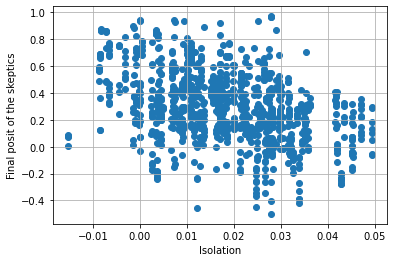

In [55]:
x = np.array(correlation_score)
y = np.array(final_score)
        
plt.scatter(-x,y)
plt.xlabel("Isolation")
plt.ylabel("Final posit of the skeptics")
plt.grid()

print(stt.spearmanr(-x,y))

### HK (standard mean)

i.e. Hegselmann Krause model with standard mean function

Define the the model

In [56]:
class HK(model):
    # initialization
    make_lab = generate_labels.ordered_numbers
    init_op = initialize_opinions.op_from_distrib
    
    # rules
    selec_rule = make_selection_rule.select_HK_random
    up_rule = make_interaction.average
    
    # observables
    mk_ob_op = make_observables.op_dic
    mk_ob_avg = make_observables.average_op
    mk_op_frq = make_observables.frequency_op
    
    # Run
    tick = ticks.tick_classic
    run = run.run_N_times

In [57]:
HK1 = HK()

Define the parameters

In [58]:
# parameters
N_agents = 1000
HK1.parameters = {"eps":3, "N_agents":N_agents}
HK1.times_2_run = 100

Run the simulation

In [59]:
initial_score = []
final_score = []
correlation_score = []

repetitions = 1000

dic_HK1_deff = {}

for rr in range(0,repetitions):

    # Select one random country
    country = random.choice(list(distributions_dic.keys()))
    country_corr = country_corr_dict[country]
    
    # Make the dictionary with the prb of answers
    dic_probability = distributions_dic[country] # this is the dictionary that will be used for cheching the probabilities
    dic_probability = invert_dic(dic_probability)
    

    HK1.make_lab(N=N_agents)

    value_of_answers = [0,1,2,3,4]

    dd = make_aggregate_prb(coeff_val=np.array(value_of_answers))

    x = []
    y = []
    for key in dd:
        x.append(key)
        y.append(dd[key])

    HK1.init_op(x_distrib=x, y_distrib=y)

    # Find agents below the threshold and their initial score
    min_ = np.min(x)
    mean_= value_of_answers[2]*3
    max_ = np.max(x)

    threshold = mean_

    initial_below_thr = get_index_below_thr(HK1.opinions, thr=threshold)
    avg1 = dic_mean(initial_below_thr)
    labels_initial_below = [key for key in initial_below_thr]

    score0 = standardize_score(avg1, min_, max_, mean_)

    # Run
    HK1.run()

    # Get the data from the end
    op_dic = HK1.opinions
    new_below_thr = {key:op_dic[key] for key in labels_initial_below}

    avg1 = dic_mean(new_below_thr)
    score_fin = standardize_score(avg1, min_, max_, mean_)

    if not np.isnan(score_fin):
        initial_score.append(score0)
        final_score.append(score_fin)
        correlation_score.append(country_corr)
        dic_HK1_deff[country] = score_fin

beep()

SpearmanrResult(correlation=-0.348127991311206, pvalue=7.248846565886133e-30)


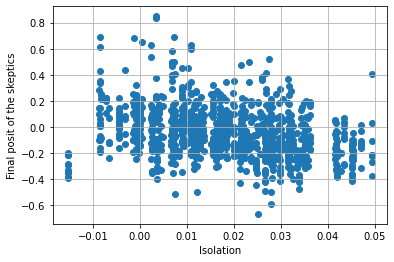

In [60]:
x = np.array(correlation_score)
y = np.array(final_score)
        
plt.scatter(-x,y)
plt.xlabel("Isolation")
plt.ylabel("Final posit of the skeptics")
plt.grid()

print(stt.spearmanr(-x,y))

### HK with geometric mean

In [61]:
class HK(model):
    # initialization
    make_lab = generate_labels.ordered_numbers
    init_op = initialize_opinions.op_from_distrib
    
    # rules
    selec_rule = make_selection_rule.select_HK_random
    up_rule = make_interaction.geo_mean
    
    # observables
    mk_ob_op = make_observables.op_dic
    mk_ob_avg = make_observables.average_op
    mk_op_frq = make_observables.frequency_op
    
    # Run
    tick = ticks.tick_classic
    run = run.run_N_times

In [62]:
HK1 = HK()

In [63]:
    # parameters
N_agents = 1000
# Run_times = 0.1 # each agent will be run, on average this number of time!
HK1.parameters = {"eps":3, "N_agents":N_agents}
HK1.times_2_run = 100

In [64]:
initial_score = []
final_score = []
correlation_score = []

repetitions = 1000

for rr in range(0,repetitions):

    # Select one random country
    country = random.choice(list(distributions_dic.keys()))
    country_corr = country_corr_dict[country]
    
    # Make the dictionary with the prb of answers
    dic_probability = distributions_dic[country] # this is the dictionary that will be used for cheching the probabilities
    dic_probability = invert_dic(dic_probability)
    

    HK1.make_lab(N=N_agents)

    value_of_answers = [0,1,2,3,4]

    dd = make_aggregate_prb(coeff_val=np.array(value_of_answers))

    x = []
    y = []
    for key in dd:
        x.append(key)
        y.append(dd[key])

    HK1.init_op(x_distrib=x, y_distrib=y)

    # Find agents below the threshold and their initial score
    min_ = np.min(x)
    mean_= value_of_answers[2]*3
    max_ = np.max(x)

    threshold = mean_

    initial_below_thr = get_index_below_thr(HK1.opinions, thr=threshold)
    avg1 = dic_mean(initial_below_thr)
    labels_initial_below = [key for key in initial_below_thr]

    score0 = standardize_score(avg1, min_, max_, mean_)

    # Run
    HK1.run()

    # Get the data from the end
    op_dic = HK1.opinions
    new_below_thr = {key:op_dic[key] for key in labels_initial_below}

    avg1 = dic_mean(new_below_thr)
    score_fin = standardize_score(avg1, min_, max_, mean_)

    if not np.isnan(score_fin):
        initial_score.append(score0)
        final_score.append(score_fin)
        correlation_score.append(country_corr)

beep()

C:\Users\DeenoZord\anaconda3\lib\site-packages\scipy\stats\stats.py:410: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


SpearmanrResult(correlation=-0.3834481054377014, pvalue=2.245937611833247e-36)


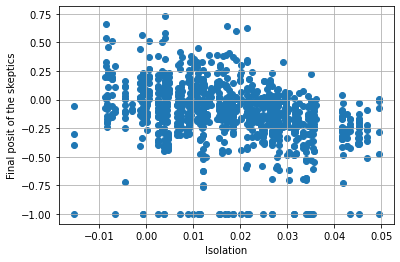

In [65]:
x = np.array(correlation_score)
y = np.array(final_score)
        
plt.scatter(-x,y)
plt.xlabel("Isolation")
plt.ylabel("Final posit of the skeptics")
plt.grid()

print(stt.spearmanr(-x,y))

## HK with H-mean

In [66]:
class HK(model):
    # initialization
    make_lab = generate_labels.ordered_numbers
    init_op = initialize_opinions.op_from_distrib
    
    # rules
    selec_rule = make_selection_rule.select_HK_random
    up_rule = make_interaction.h_mean
    
    # observables
    mk_ob_op = make_observables.op_dic
    mk_ob_avg = make_observables.average_op
    mk_op_frq = make_observables.frequency_op
    
    # Run
    tick = ticks.tick_classic
    run = run.run_N_times

In [67]:
HK1 = HK()

In [68]:
    # parameters
N_agents = 1000
# Run_times = 0.1 # each agent will be run, on average this number of time!
HK1.parameters = {"eps":9, "N_agents":N_agents}
HK1.times_2_run = 100

In [69]:
initial_score = []
final_score = []
correlation_score = []

repetitions = 1000

for rr in range(0,repetitions):

    # Select one random country
    country = random.choice(list(distributions_dic.keys()))
    country_corr = country_corr_dict[country]
    
    # Make the dictionary with the prb of answers
    dic_probability = distributions_dic[country] # this is the dictionary that will be used for cheching the probabilities
    dic_probability = invert_dic(dic_probability)
    

    HK1.make_lab(N=N_agents)

    value_of_answers = [0,1,2,3,4]

    dd = make_aggregate_prb(coeff_val=np.array(value_of_answers))

    x = []
    y = []
    for key in dd:
        x.append(key)
        y.append(dd[key])

    HK1.init_op(x_distrib=x, y_distrib=y)

    # Find agents below the threshold and their initial score
    min_ = np.min(x)
    mean_= value_of_answers[2]*3
    max_ = np.max(x)

    threshold = mean_

    initial_below_thr = get_index_below_thr(HK1.opinions, thr=threshold)
    avg1 = dic_mean(initial_below_thr)
    labels_initial_below = [key for key in initial_below_thr]

    score0 = standardize_score(avg1, min_, max_, mean_)

    # Run
    HK1.run()

    # Get the data from the end
    op_dic = HK1.opinions
    new_below_thr = {key:op_dic[key] for key in labels_initial_below}

    avg1 = dic_mean(new_below_thr)
    score_fin = standardize_score(avg1, min_, max_, mean_)

    if not np.isnan(score_fin):
        initial_score.append(score0)
        final_score.append(score_fin)
        correlation_score.append(country_corr)

beep()

SpearmanrResult(correlation=-0.4309115832744135, pvalue=1.7843242263151594e-46)


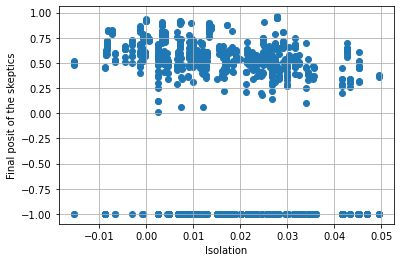

In [70]:
x = np.array(correlation_score)
y = np.array(final_score)
        
plt.scatter(-x,y)
plt.xlabel("Isolation")
plt.ylabel("Final posit of the skeptics")
plt.grid()

print(stt.spearmanr(-x,y))

### Axelrod model

In [71]:
class axelros_base(model):
    # initialization
    make_lab = generate_labels.ordered_numbers
    init_op = initialize_opinions.axel_from_distrib
#     mk_network = mk_network.mk_lattice
    
    # rules
    selec_rule = make_selection_rule.select_random # (we are not using a lattice)
    up_rule = copy_trait_distance_
    
    # observables
#     mk_observables = make_observables.average_op
    
    # Run
    tick = ticks.tick_classic
    run = run.run_N_times

In [72]:
# initialize
repetitions = 1000

initial_score = []
final_score = []
correlation_score = []

USE_COUNTRIES = False

distance_exponent = 1

if USE_COUNTRIES:
    repetitions = len(countries)
else:
    repetitions = 1000

axel1 = axelros_base()

N_agents = 1000
axel1.times_2_run = 1000

value_of_answers = [0,1,2,3,4]
n_attitudes = 3
    
# Start the repetition
for rr in range(0,repetitions):

    # Select one random country
    if USE_COUNTRIES:
        country = countries[rr]
    else:
        country = random.choice(list(distributions_dic.keys()))
    
    country_corr = country_corr_dict[country]
    
    # Make the dictionary with the prb of answers
    dic_probability = distributions_dic[country] # this is the dictionary that will be used for cheching the probabilities
    dic_probability = invert_dic(dic_probability)
    
    
    # Define the max distance
    possible_answers = []
    prb_answers = []

    for key in dic_probability:
        t = transform_raw_vec(vec=key, coeff_val=value_of_answers)
        possible_answers.append(t)
        prb_answers.append(dic_probability[key])

    possible_answers = np.array(possible_answers)
    prb_answers = np.array(prb_answers)

    axel1.parameters = {"max_distance": (max(value_of_answers)-min(value_of_answers))*n_attitudes}
    
    # initialize the agents
    axel1.make_lab(N=N_agents)
    axel1.init_op(x_distrib=possible_answers, y_distrib=prb_answers)

    # Find agents below the threshold
    op_ = dic2array(axel1.opinions)[1]
    op2 = []
    for el in op_:
        op2.append(np.sum(el))
    op2 = np.array(op2)

    # parameters for normalization
    min_ = np.min(value_of_answers)*3
    mean_= value_of_answers[2]*3
    max_ = np.max(value_of_answers)*3

    index = np.array(range(0,len(op2)))
    initial_below_thr = index[np.array(op2)<=mean_]

    avg1_ = np.mean(op2[initial_below_thr])
    score0 = standardize_score(avg1_, min_, max_, mean_)

    initial_score.append(score0)

    # Run
    axel1.run()

    # Find agents below the threshold again
    op_ = dic2array(axel1.opinions)[1]
    op2 = []
    for el in op_:
        op2.append(np.sum(el))
    op2 = np.array(op2)

    avg1_ = np.mean(op2[initial_below_thr])
    score_fin = standardize_score(avg1_, min_, max_, mean_)

    if not np.isnan(score_fin):
        final_score.append(score_fin)
        correlation_score.append(country_corr)

SpearmanrResult(correlation=-0.5626052926425364, pvalue=1.5059615169704434e-84)


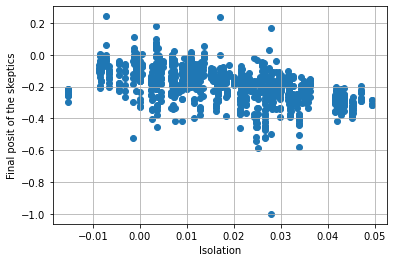

In [73]:
x = np.array(correlation_score)
y = np.array(final_score)
        
plt.scatter(-x,y)
plt.xlabel("Isolation")
plt.ylabel("Final posit of the skeptics")
plt.grid()

print(stt.spearmanr(-x,y))